Задание
1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,

Да - удоволетворяет особенностям и формулировке временные ряды

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

Да - удоволетворяет особенностям и формулировке временные ряды

в) количество отказов компьютера,

Нет - имеет случайны вид и значения не связаны

г) число обращений в поликлинику по району,

Нет - имеет случайны вид и значения не связаны

д) координаты автобуса при движении по маршруту,

Наверное да. Координаты изменяются во времени и зависят от предыдущего

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

Наверное больше нет - имеет случайны вид и значения не связаны

#### 2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.metrics import mean_squared_error
import os

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [5]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [6]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

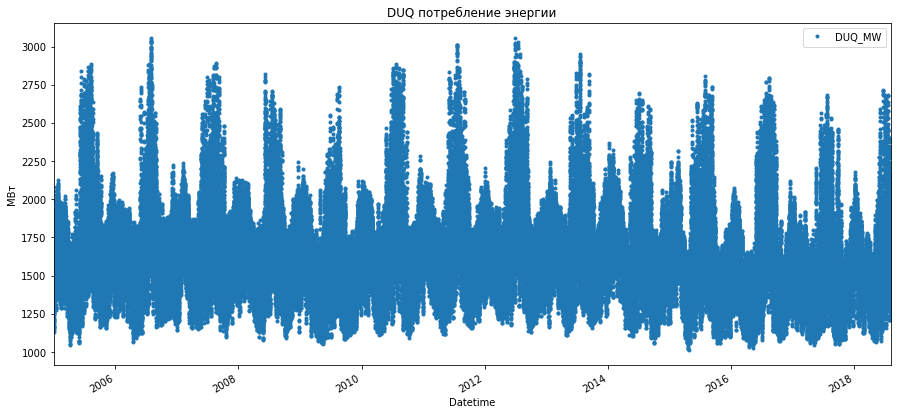

In [7]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

In [8]:
data['date'] = data.index
data_2012 = data.loc[np.logical_and( np.logical_and( data['date'].dt.year == 2012 , data['date'].dt.month == 10), data['date'].dt.day > 20  )]

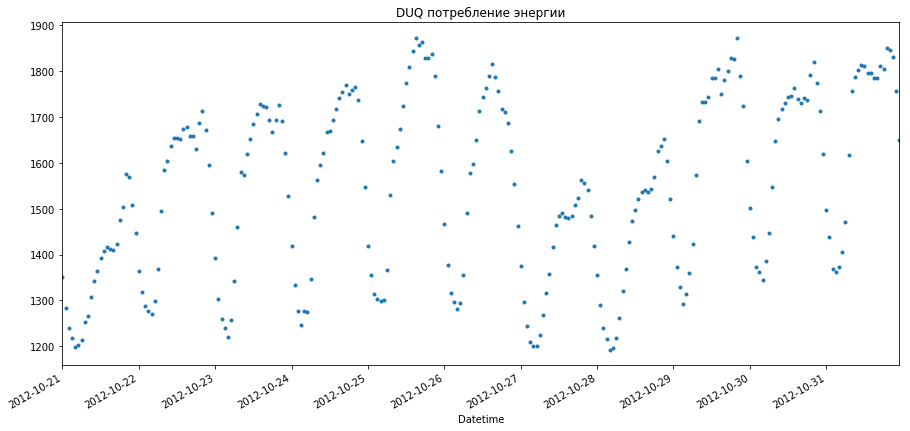

In [9]:
_ = data_2012['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ потребление энергии' )

In [10]:
# Теперь целые
data['DUQ_MW'] = data['DUQ_MW'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 2 columns):
DUQ_MW    119068 non-null int32
date      119068 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.3 MB


In [11]:
data['date'] = data.index
data.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458,2005-12-31 01:00:00
2005-12-31 02:00:00,1377,2005-12-31 02:00:00
2005-12-31 03:00:00,1351,2005-12-31 03:00:00
2005-12-31 04:00:00,1336,2005-12-31 04:00:00
2005-12-31 05:00:00,1356,2005-12-31 05:00:00


In [12]:
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [13]:
count_data = data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

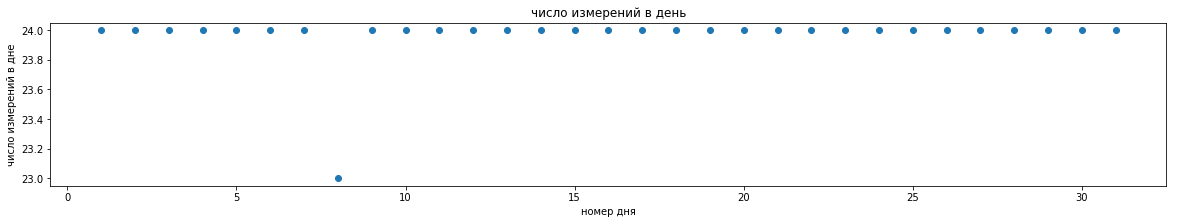

In [14]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

In [15]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

8    23
Name: Datetime, dtype: int64

In [16]:
data['2015-03-08 01:00:00':'2015-03-08 06:00:00'].index

DatetimeIndex(['2015-03-08 01:00:00', '2015-03-08 02:00:00',
               '2015-03-08 04:00:00', '2015-03-08 05:00:00',
               '2015-03-08 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

In [17]:
day_H=data['2014-03-01 00:00:00':'2014-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2014 = Day_count[Day_count != 24].index
d2014

Int64Index([9], dtype='int64')

In [18]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2015 =Day_count[Day_count != 24].index
d2015

Int64Index([8], dtype='int64')

In [19]:
day_H=data['2016-03-01 00:00:00':'2016-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2016 =Day_count[Day_count != 24].index
d2016

Int64Index([13], dtype='int64')

In [20]:
day_H=data['2017-03-01 00:00:00':'2017-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2017 =Day_count[Day_count != 24].index
d2017

Int64Index([12], dtype='int64')

In [21]:
v1 = list((data['2014-03-09 02:00:00']['DUQ_MW'].values + data['2014-03-09 04:00:00']['DUQ_MW'].values) / 2)
print(v1)
v2 = list((data['2015-03-08 02:00:00']['DUQ_MW'].values + data['2015-03-08 04:00:00']['DUQ_MW'].values) / 2)
v3 = list((data['2016-03-13 02:00:00']['DUQ_MW'].values + data['2016-03-13 04:00:00']['DUQ_MW'].values) / 2)
v4 = list((data['2017-03-12 02:00:00']['DUQ_MW'].values + data['2017-03-12 04:00:00']['DUQ_MW'].values) / 2)
v =np.reshape([v1[0],v2[0],v3[0],v4[0]],(4,1))
v

df_data = pd.DataFrame(index = pd.to_datetime(pd.Series(['2014-03-09 03:00:00','2015-03-08 03:00:00','2016-03-13 03:00:00','2017-03-12 03:00:00'])), columns =['DUQ_MW'] , data = v) 
df_data['date'] = df_data.index
df_data.head()
#
data = data.append(df_data,sort = False)
data.tail()
#data['2014-03-09 03:00:00'] 

[1415.0]


,DUQ_MW,date
2018-01-02 00:00:00,1721.0,2018-01-02 00:00:00
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00


In [22]:
count_data.iloc[:4]

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
Name: date, dtype: int64

In [23]:
data.loc[count_data.iloc[:4].index]

,DUQ_MW,date
2017-11-05 02:00:00,1131.0,2017-11-05 02:00:00
2017-11-05 02:00:00,1105.0,2017-11-05 02:00:00
2014-11-02 02:00:00,1272.0,2014-11-02 02:00:00
2014-11-02 02:00:00,1240.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1113.0,2015-11-01 02:00:00
2015-11-01 02:00:00,1138.0,2015-11-01 02:00:00
2016-11-06 02:00:00,1121.0,2016-11-06 02:00:00
2016-11-06 02:00:00,1107.0,2016-11-06 02:00:00


In [24]:
df = data.loc[count_data.iloc[:4].index]
df_ = df.groupby('date').mean()
df_['date'] = df_.index
print(df_)
print(df)
data.drop(count_data.iloc[:4].index)
data.shape

                     DUQ_MW                date
date                                           
2014-11-02 02:00:00  1256.0 2014-11-02 02:00:00
2015-11-01 02:00:00  1125.5 2015-11-01 02:00:00
2016-11-06 02:00:00  1114.0 2016-11-06 02:00:00
2017-11-05 02:00:00  1118.0 2017-11-05 02:00:00
                     DUQ_MW                date
2017-11-05 02:00:00  1131.0 2017-11-05 02:00:00
2017-11-05 02:00:00  1105.0 2017-11-05 02:00:00
2014-11-02 02:00:00  1272.0 2014-11-02 02:00:00
2014-11-02 02:00:00  1240.0 2014-11-02 02:00:00
2015-11-01 02:00:00  1113.0 2015-11-01 02:00:00
2015-11-01 02:00:00  1138.0 2015-11-01 02:00:00
2016-11-06 02:00:00  1121.0 2016-11-06 02:00:00
2016-11-06 02:00:00  1107.0 2016-11-06 02:00:00


(119072, 2)

Удалим дубликаты

In [25]:
data.drop_duplicates()
data.shape

(119072, 2)

In [26]:
data = data.append(df_,sort = False)
data.tail()

,DUQ_MW,date
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00
2014-11-02 02:00:00,1256.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1125.5,2015-11-01 02:00:00
2016-11-06 02:00:00,1114.0,2016-11-06 02:00:00
2017-11-05 02:00:00,1118.0,2017-11-05 02:00:00


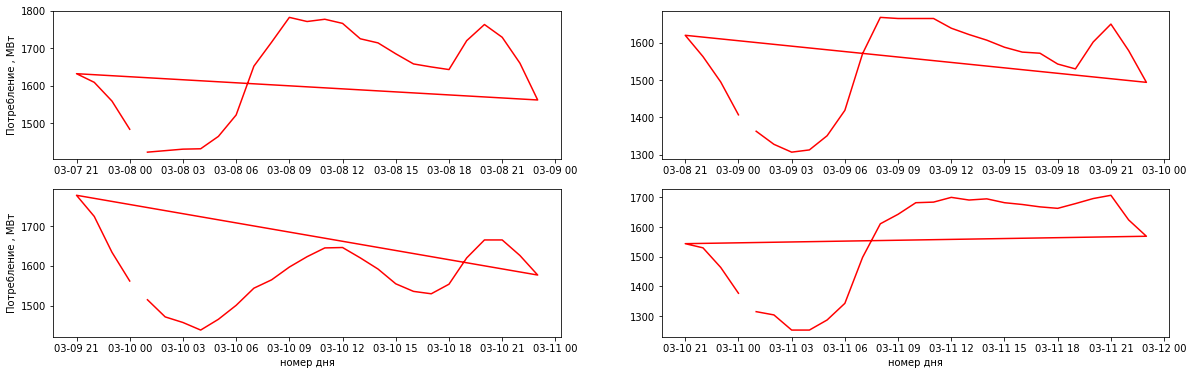

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(data['2010-03-07 21:00:00':'2010-03-8 23:00:00'].index,data['2010-03-07 21:00:00':'2010-03-08 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')

plt.subplot(2,2,2)
plt.plot(data['2015-03-08 21:00:00':'2015-03-9 23:00:00'].index,data['2015-03-08 21:00:00':'2015-03-09 23:00:00']['DUQ_MW'].values, 'r')

plt.subplot(2,2,3)
plt.plot(data['2012-03-09 21:00:00':'2012-03-10 23:00:00'].index,data['2012-03-09 21:00:00':'2012-03-10 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')
plt.xlabel('номер дня')

plt.subplot(2,2,4)
plt.plot(data['2013-03-10 21:00:00':'2013-03-11 23:00:00'].index,data['2013-03-10 21:00:00':'2013-03-11 23:00:00']['DUQ_MW'].values, 'r')
plt.xlabel('номер дня')

plt.show()

In [28]:
data = data.sort_index()

In [29]:
data.iloc[19:26,:]

,DUQ_MW,date
2005-01-01 20:00:00,1546.0,2005-01-01 20:00:00
2005-01-01 21:00:00,1541.0,2005-01-01 21:00:00
2005-01-01 22:00:00,1534.0,2005-01-01 22:00:00
2005-01-01 23:00:00,1497.0,2005-01-01 23:00:00
2005-01-02 00:00:00,1389.0,2005-01-02 00:00:00
2005-01-02 01:00:00,1251.0,2005-01-02 01:00:00
2005-01-02 02:00:00,1204.0,2005-01-02 02:00:00


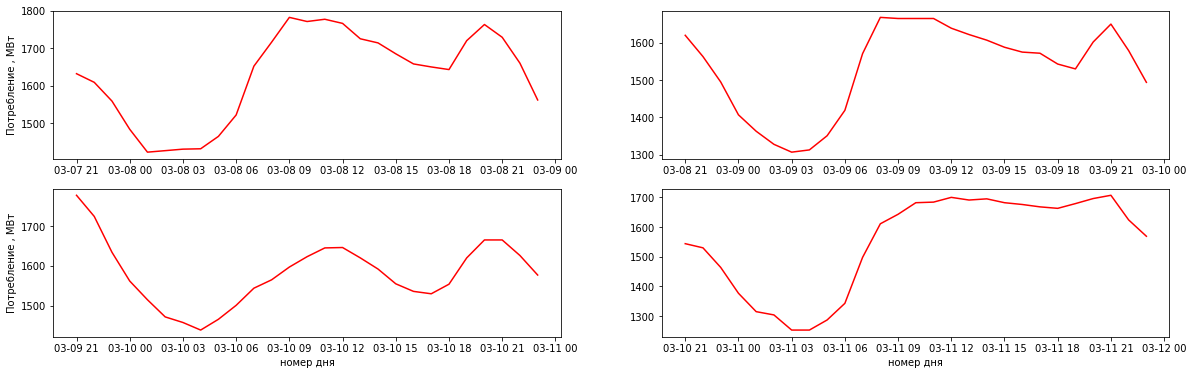

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(data['2010-03-07 21:00:00':'2010-03-8 23:00:00'].index,data['2010-03-07 21:00:00':'2010-03-08 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')

plt.subplot(2,2,2)
plt.plot(data['2015-03-08 21:00:00':'2015-03-9 23:00:00'].index,data['2015-03-08 21:00:00':'2015-03-09 23:00:00']['DUQ_MW'].values, 'r')

plt.subplot(2,2,3)
plt.plot(data['2012-03-09 21:00:00':'2012-03-10 23:00:00'].index,data['2012-03-09 21:00:00':'2012-03-10 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')
plt.xlabel('номер дня')

plt.subplot(2,2,4)
plt.plot(data['2013-03-10 21:00:00':'2013-03-11 23:00:00'].index,data['2013-03-10 21:00:00':'2013-03-11 23:00:00']['DUQ_MW'].values, 'r')
plt.xlabel('номер дня')

plt.show()

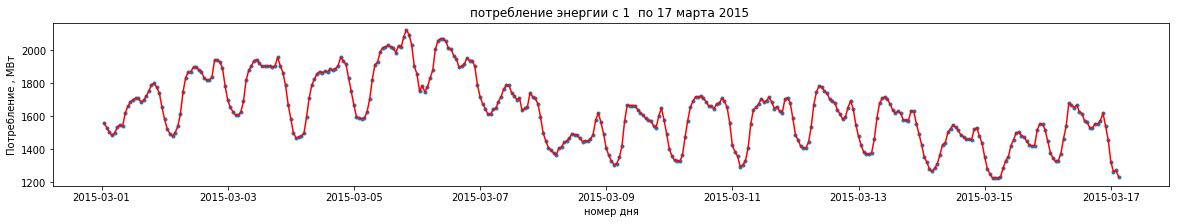

In [31]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-01 01:00:00':'2015-03-17 03:00:00'].index,data['2015-03-01 01:00:00':'2015-03-17 03:00:00']['DUQ_MW'].values, '.')
plt.plot(data['2015-03-01 01:00:00':'2015-03-17 03:00:00'].index,data['2015-03-01 01:00:00':'2015-03-17 03:00:00']['DUQ_MW'].values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии с 1  по 17 марта 2015 ')
plt.show()

#### Данные исправлены

#### 3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [32]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [33]:
brent_data_weak = brent_data.resample('W').mean() 
brent_data_weak.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [34]:
brent_data_month = brent_data.resample('M').mean() 
brent_data_month.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


#### 4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [35]:
brent_data_weak['Значение'].isnull().sum()

1

In [36]:
brent_data_weak.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 1 columns):
Значение    469 non-null float64
dtypes: float64(1)
memory usage: 7.3 KB


In [37]:
brent_data_weak = brent_data_weak.dropna()

In [38]:
brent_data_weak['Значение'].isnull().sum()

0

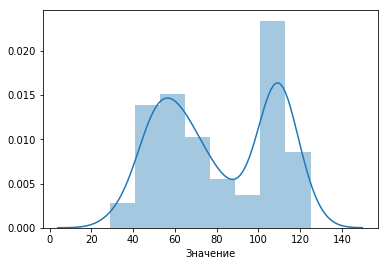

In [39]:
sns.distplot(brent_data_weak ['Значение']);

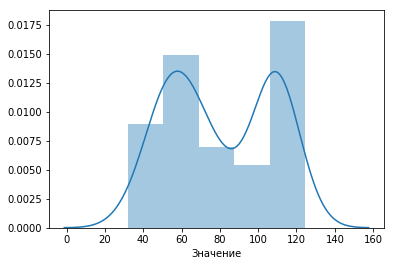

In [40]:
sns.distplot(brent_data_month['Значение']);

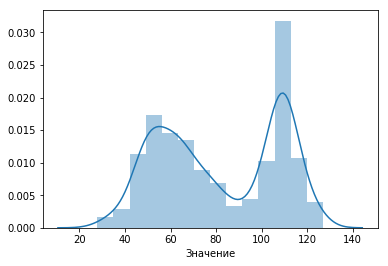

In [98]:
sns.distplot(brent_data['Значение']);

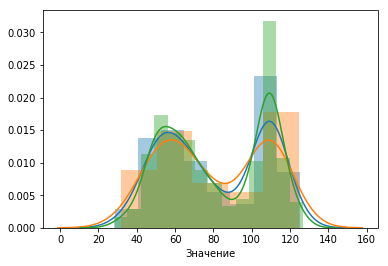

In [41]:
sns.distplot(brent_data_weak ['Значение']);
sns.distplot(brent_data_month['Значение']);
sns.distplot(brent_data['Значение']);

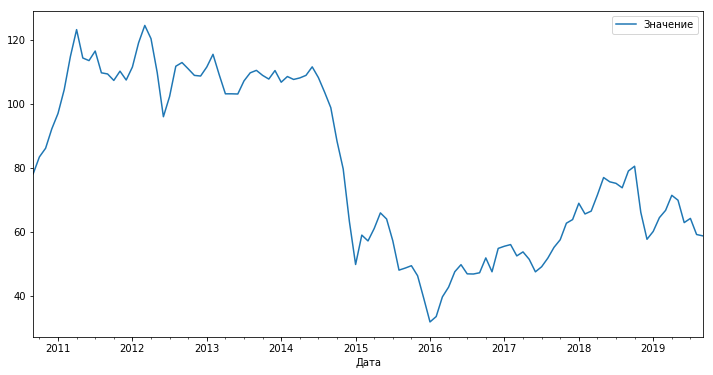

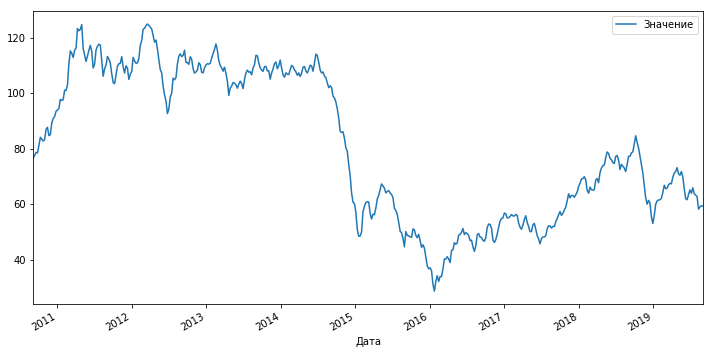

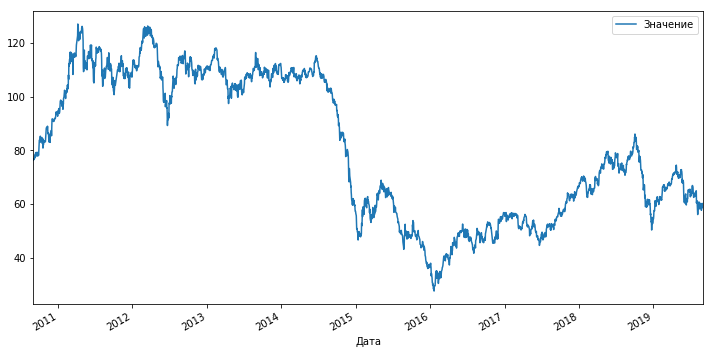

In [42]:
brent_data_month.plot(figsize=(12,6))
brent_data_weak.plot(figsize=(12,6))
brent_data.plot(figsize=(12,6))

#### 5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Т.к. ресемплинг делается по среднему, то все выбросы усредняются и чем больше период выборке тем сглаженный график